<figure><center>
<img   src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" align=center  width="2000px"/>
</center></figure>

<a id='Notebook_Date'></a> Created: 2024/05/03

Authors:
* Carmen Calvo ([SCAYLE](https://www.scayle.es/)), Antoni Alou ([PIC](https://www.pic.es/)), Carlos Hernani ([UV](https://www.uv.es/)), Nahia Iriarte ([NASERTIC](https://www.nasertic.es/es)) y Carlos Luque ([IAC](https://www.iac.es/))


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\tr}{{\rm tr}}$
$ \newcommand{\bn}{{\bf n}} $

Consulta la notación que se ha utilizado durante todo el documento en el siguiente [enlace](#notacion).

<a id='sec_QML_Quantum_Kernels'></a>

# 5. Quantum Kernels

En esta sección, se tratarán los **métodos kernel**. En primer lugar se presentarán los kernel clásicos, para luego trasladar esta misma idea a la computación cuántica. A su vez, se presentarán algunas implementaciones de kernel cuántico y se mostrará la matriz asociada a cada caso.

<a id='sec_IntroKernel'></a>
## 5.1. Introducción a los métodos kernel 

Los métodos kernel representan los datos en un número de dimensiones mayor por lo que ayudan a encontrar nuevos patrones en los datos. Estas técnicas son muy utilizadas en aprendizaje supervisado, ya que permiten transformar los problemas no lineales en lineales donde los datos son representandos en un espacio de mayor dimensión.

La expresión general de los kernel es $k(\mathbf{x_{i}},\mathbf{x_{j}}) = \langle  f(\mathbf{x_{i}}), f(\mathbf{x_{j}}) \rangle$ donde $\mathbf{x_{i}}$ y $\mathbf{x_{j}}$ corresponden a los datos de entradas de dimensión $n$, $f$ representa la función que transforma los datos de entradas de dimensión $n$ en un espacio de dimensión $m$ y $\langle \mathbf{a}, \mathbf{b} \rangle$ denota el producto interno. Considerando un conjunto de datos, la función kernel se puede representar mediante una matriz, conocida como **matriz kernel**, $K_{ij} = K(\mathbf{x_{i}},\mathbf{x_{j}})$ [[1]](#bib_textbookkernel).


A continuación,en la [Figura 1](#fig_ejemploDSKernel), se muestra un ejemplo visual para comprender la idea en la que se basan los kernel. 

<figure><center>
<a id="fig_ejemploDSKernel"></a>
<img src="imagenes/EjemploDataset_kernel.PNG" alt="Visualización--del--dataset--de--ejemplo--en--2D--[1]." align=center width="300px"/>
<center>Figure 1. Visualización del dataset de ejemplo en 2D [[1]](#bib_textbookkernel).</center>
</center></figure>



Este conjunto de datos (*dataset* en inglés) cuenta con dos clases (azul y morada) y se aprecia una clara estructura en los datos de n dimensiones. Concretamente se distinguen dos circulos cada uno de ellos corresponde a una clase y uno está dentro del otro. Por lo tanto, en dos dimensiones no se puede separar las clases linealmente, en otras palabras, la frontera de decisión no será lineal. Se trata de trasladar los datos a un espacio de dimensión mayor para así poder separar ambas clases. En este caso en particular se define la tercera dimensión como $z =  x^2+y^2$. En la [Figura 2](#fig_FeatureMapKernel) se muestra lo comentado:

<figure><center>
<a id="fig_FeatureMapKernel"></a>
<img src="imagenes/featureMap_KERNEL.PNG" alt= "--Visualización--del--objetivo--de--los--métodos--kernel--[1]." align=center width="600px"/>
<center>Figure 2. Visualización del objetivo de los métodos kernel [[1]](#bib_textbookkernel).</center>
</center></figure>

Se observa que cuando los datos se representan en tres dimensiones existe un hiperplano que clasifica correctamente ambas clases. Proyectando el hiperplano de nuevo en las dimensiones originales la frontera de decisión es no lineal. Cabe destacar que esta manera de trabajar con la no linealidad en los modelos proporcionan la posibilidad de reconocer patrones en el espacio de datos original.

<div class="alert alert-block alert-danger">
<p style="color: DarkRed;">
<b>Nota</b>:
<br>
<br>
En algunas fuentes de información la expresión del kernel se expresa $K(\mathbf{x_{i}},\mathbf{x_{j}}) = \phi(\mathbf{x_{j}})^T \phi(\mathbf{x_{i}})$, en este caso la función que realiza el mapeo se denota mediante $\phi()$. Esta función también se conoce como <b>feature map</b> [[2]](#bib_ClassesKernels).
</p>
</div>

Los métodos kernel son muy utilizados junto al algoritmo *support vector machine* (SVM) en conjuntos de datos no lineales, debido a la transformación de los conjuntos de datos a lineales donde este algoritmo trata de encontrar el hiperplano $(\mathbf{w},b)$ que mejor separa las distintas clases. En este [*enlace*](Chapter_04_QSVM.ipynb#sec_QML_QSVM) se puede encontrar más información a cerca de esta técnica de clasificación.

<a id='sec_IntroQuantumKernel'></a>
## 5.2. Introducción al kernel cuántico

Una vez se ha comentado la idea que persiguen los métodos kernel en computación clásica se aborda el funcionamiento de estas técnicas en computación cuántica. Para visualizar la idea general y el funcionamiento de ambos tipos de kernel se adjunta la [Figura 3](#fig_CK_QK): 

<figure><center>
<a id="fig_CK_QK"></a>
<img src="imagenes/ClassicalKernel_QuantumKernel.PNG" alt="--Comparación--entre--kernel--clásico--y--cuántico--[[3]](#bib_QuantumKernelMethod)." align=center width="800px"/>
<center>Figure 3. Comparación entre kernel clásico y cuántico [[3]](#bib_QuantumKernelMethod).</center>
</center></figure>

Como se aprecia en la [Figura 3](#fig_CK_QK)  en ambos casos se trabaja con un *feature map* que se denota como $\phi(\mathbf{x})$, se encarga de transformar los datos del espacio de datos original a un nuevo espacio de características. No obstante, aunque existen similitudes en lo que se refiere al concepto, también se aprecian diferencias en la expresión de la función kernel o que la función kernel cuántica además de llevar a cabo el cambio de dimensión, transforma los datos en **estados cuánticos**.

Tal y como se adelantaba en la comparación representada en la [Figura 3](#fig_CK_QK), al tratar datos clásicos medicante algoritmos de *Quantum Machine Learning* estos mismos deben encargarse de codificar los datos en estados cuánticos para posteriormente poder trabajar con ellos. Este proceso es equivalente a una función _feature map_ que asigna los valores a estados cuánticos, concretamente $\phi(\mathbf{x})$ mapea el vector de características $\mathbf{x}$ en el espacio de Hilbert $\ket{\phi(\mathbf{x})}\bra{\phi(\mathbf{x})}$ [[1]](#bib_textbookkernel). Mediante la función kernel se lleva a cabo la codificación de los datos, conocida como ***data_encoding***. El quantum kernel se puede interpretar como una medida de similitud, de forma que $k(\mathbf{x_{i}},\mathbf{x_{j}})$ tomará un valor elevado cuando $\mathbf{x_{i}}$ y $\mathbf{x_{j}}$ sean cercanos [[4]](#bib_PowerData).  

La codificación de los datos es una fase fundamental en QML y exiten varias técnicas que abordan este reto, en este [*enlace*](Chapter_02_Feature_encoding.ipynb#sec_QML_FeatureEncoding) se puede encontrar más información a cerca de esta temática.

Entender los modelos cuánticos como métodos kernel significa que la expresividad, optimización y el comportamiento al generalizar los modelos están determinados en gran medida por la estrategia de codificación, la cual viene fijada por el método kernel [[5]](#bib_SupQML). Además significa que aunque el propio kernel puede explorar espacios de datos de dimensionalidad alta en el sistema cuántico y los modelos cuánticos pueden entrenar y operar en subespacios de dimensiones más bajas.

Al igual que en el caso clásico, el puente entre el QML y los métodos kernel esta formado por la observación de que los modelos cuánticos mapean los datos en una dimensión superior en la cual la medida define una frontera de decisión lineal.

<a id='sec_ImplementacionesKernel'></a>
## 5.3. Distintas implementaciones de kernel

El entrenamiento basado en métodos kernel pasan por alto el procesado y la medición que implementan los circuitos variacionales, de manera que solo dependerá de la codificación de los datos [[6]](#bib_kernelMethodsML).


A continuación se adjunta una implementeación de distintos tipos de métodos kernel. Por un lado, se muestran dos ejemplos de ***Quantum Kernel Estimation*** (QKE). Por otro lado, se adjunta el código para el denominado ***swap test***. Para comprobar el correcto funcionamiento de estos ejemplos, se hará uso del dataset iris, ya que se trata de un problema de clasificación sencillo.

In [1]:
## Se cargan las librerias necesarias para porder ejecutar las próximas celdas
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from qibo import callbacks, gates, hamiltonians, models
from qibo.models import Circuit
from qibo.symbols import X, Y, Z, I

import seaborn as sns

from qibo import set_backend
#Uso de backend de numpy en Qibo
set_backend("numpy")

[Qibo 0.1.12.dev0|INFO|2024-05-09 15:12:03]: Using numpy backend on /CPU:0


In [2]:
# Generamos el dataset mediante la función "load_iris".
# Almacenamos los datos de entrada (inputs) en X y la etiqueta (label) correspondiente en y.
X, y = load_iris(return_X_y=True)

# Seleccionamos unicamente los inputs y labels de las dos primeras clases,
# esto corresponde a seleccionar las primeras 100 instancias
X = X[:100]
y = y[:100]

# Estandarizar los valores de los datos de entrada es importante
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Cambiamos los valores de las etiquetas a -1, 1. Se trata de un proceso importante para el clasificador SVM
# y la definición de la función de coste.
y_scaled = 2 * (y - 0.5)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=123)

Se adjunta la función _kernel_matrix_, esta será la que se utilice para calcular la matriz kernel. Todas las implementaciones finalizan obteniendo la matriz kernel y mostrandola gráficamente.

In [3]:
def kernel_matrix(kernel,A, B, nqubits):

    return np.array([[kernel(a, b, nqubits) for b in B] for a in A])

<a id='sec_SWAPtest'></a>
### 5.3.1. SWAP test

Para implementar el kernel se preparan los estados $\ket{\phi(\mathbf{x_{i}})},\ket{\phi(\mathbf{x_{j}})}$ en conjuntos de cúbits diferentes mediante rutinas de codificación, $U(\mathbf{x_{i}}), U(\mathbf{x_{j}})$. Generalmente este primer paso se suele llevar a cabo mediante rotaciones, en el ejemplo que se muestra a continuación se trabaja con rotaciones en el eje Y. Tras codificar los datos clásicos en estado cuánticos, se mide el solapamiento con una rutina que se denomina ***SWAP test*** [[7]](#bib_pennylane_kernel). 

<figure><center>
<a id="fig_swaptest_kernel"></a>
<img src="imagenes/SwapTest_kernel.PNG" alt="Circuito--asociado--a--la--rutina--SWAP--test." align=center width="300px"/>
<center>Figure 4. Circuito asociado a la rutina SWAP test.</center>
</center></figure>

En la [Figura 4](#fig_swaptest_kernel) anterior se muestra el circuito necesario para implementar esta rutina y a continuación se implementa esta rutina.

In [4]:
# Definimos el número de qubits necesarios
nqubits=5

def circ_kernel_swap(x1, x2, nqubits):
    # Inicializamos el circuito con "nqubits"
    c= Circuit(nqubits=nqubits)
    
    # Generamos el Feature map mediante puertas RY
    c.add(gates.RY(q=1, theta=x1[0]))
    c.add(gates.RY(q=2, theta=x1[1]))
    c.add(gates.RY(q=3, theta=x2[0]))
    c.add(gates.RY(q=4, theta=x2[1]))
    
    # Kernel swap    
    c.add(gates.H(q=0))
    c.add(gates.SWAP(1,3).controlled_by(0))
    c.add(gates.SWAP(2,4).controlled_by(0))
    c.add(gates.H(q=0))
    
    # Añadimos la medida en el qubit 0
    c.add(gates.M(0))
    
    return c


# Definimos el observable necesario para calcular el valor esperado
def hamiltonian():
    Obj = np.prod([ Z(0), I(1), I(2), I(3), I(4)])
    h = hamiltonians.SymbolicHamiltonian(Obj)
    return h

# Calculamos el valor esperado que produce el circuito
def expVal_swap_test(x1, x2, nqubits, nshots=10000):
    c = circ_kernel_swap(x1, x2, nqubits)
    h = hamiltonian()
    expected_value = h.expectation(c.execute().state())
    
    return expected_value


En la siguiente celda se comprueba el correcto funcionamiento de la función _kernel_swap_, la comprobación consiste en medir el solapamiento de un ejemplo con el mismo, por lo que el resultado debe ser 1.

In [5]:
# Se comprueba que el funcionamiento es adecuado.
expVal_swap_test(X_train[0], X_train[0], nqubits) 

0.9999999999999997

Se analiza la matriz kernel

In [6]:
# Calculamos la matriz kernel al completo
matriz_swap = kernel_matrix(expVal_swap_test, X_train, X_train, nqubits)

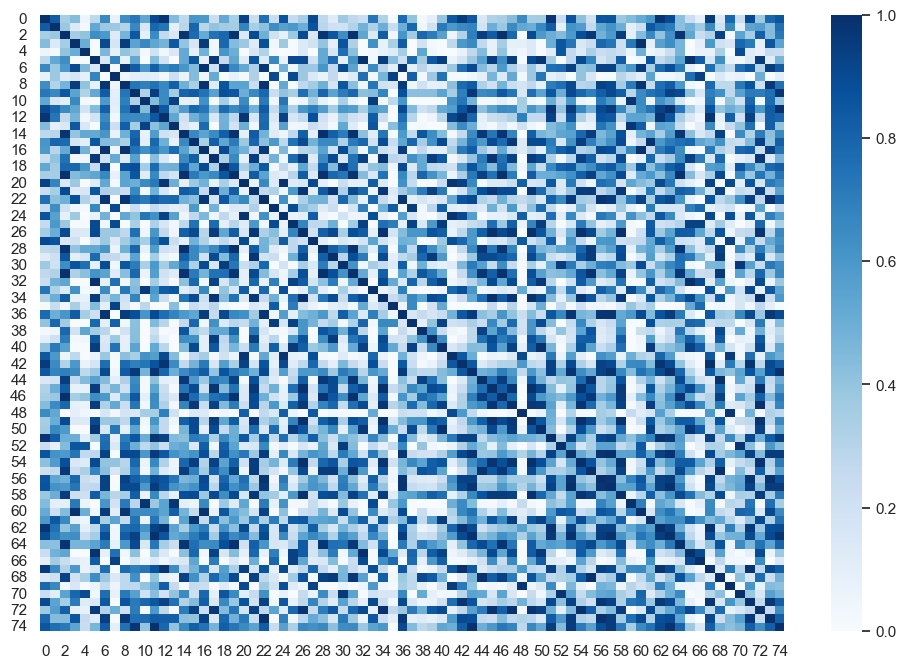

In [7]:
# Mostrar la matriz kernel mediante un mapa de calor.

sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(matriz_swap, vmin = 0, vmax = 1, cmap=sns.color_palette("Blues", as_cmap=True));

Se puede observar de la matriz kernel lo siguiente:
1. Cada fila / columna representa la amplitud de transición de una muestra, con todos las demás muestras del conjunto de datos.

2. La amplitud de transición de una muestra consigo mismo es 1, por lo que la matriz tiene una diagonal unitaria.

3. La matriz es simétrica, la amplitud de transición de **x** $\rightarrow$ **y** es igual **y** $\rightarrow$ **x** 

<a id='sec_QKE'></a>
### 5.3.2. Quantum Kernel Estimator


El *Quantum Kernel Estimator*, QKE, necesita la mitad de cúbits comparado con la versión de SWAP test y consiste en aplicar el operador unitario de codificación $\ket{U(\mathbf{x_{i}})}$ y su inverso en los mismos cúbits $\bra{U^{\dagger}(\mathbf{x_{j}})}$ como se visualiza en la [Figura 5](#fig_qsvc). 

<figure><center>
<a id="kernel_circuit"></a>
<img src="imagenes/kernel_circuit_ejemplo.png" alt="Circuito--asociado--a--los--Quantum--Kernel--Estimator--[[8]](#bib_quantumSpeedUp)." align=center width="400px"/>
<center>Figure 5. Circuito asociado a los Quantum Kernel Estimator [[8]](#bib_quantumSpeedUp).</center>
</center></figure>

Por tanto, la fórmula del kernel, K, se define como,

$$ K(\mathbf{x_{i}},\mathbf{x_{j}}) = |\braket{\phi(\mathbf{x_{j}})}{\phi(\mathbf{x_{i}})}|^2 = |\bra{0..0}U(\mathbf{x_{j}})^{\dagger}U(\mathbf{x_{i}})\ket{0..0}|^2$$

El QKE se puede implementar en dos versiones de circuitos que se expone a continuación:
1. proyector
1. probabilidades

En las siguientes celdas se implementa el mismo kernel de dos formas distintas. En ambos casos la codificación se lleva a cabo mediante _angle embedding_ y luego se aplica el adjunto tal y como se comentaba. La diferencia viene a la hora de calcular el solapamiento, en el primer caso se utiliza el proyector y en el segundo se calcula la probabilidad de $\ket{0}$.

Se hace uso de la codificación ***angle embedding*** por lo que serán necesarios tantos cúbits como carácteristicas tiene el dataset, se puede obtener más información a cerca de esta codificación en el siguiente [*enlace*](Chapter_02_Feature_encoding.ipynb#sec_QML_FeatureEncoding).

En primer lugar, se obtiene el número de características de cada muestra en el dataset Iris, con el que se está trabajando en este ejemplo. Por ello, el número de cúbits será el número de característica por muestra del conjunto de datos.

In [8]:
n_qubits = len(X_train[0])
print("Número de qubits:", n_qubits)

Número de qubits: 4


<a id='sec_QKE_proyector'></a>
#### 5.3.2.1. Quantum Kernel Estimator (QKE) - proyector

In [9]:
nqubits = len(X_train[0]) 

def circ_kernel_QKE(x, y, nqubits):
    
    # cuatro cúbits: cuatro características
    n_shots = 8000

    # Inicializar el circuito, generar un circuito vacio
    circuit = Circuit(n_qubits)

    # Codificación cuántica en puertas RY y medir todos los qubits
    for pos in range(n_qubits):
        circuit.add(gates.RY(pos, y[pos]))
        circuit.add(gates.RY(pos, x[pos]).dagger())
        circuit.add(gates.M(pos))
    
    return circuit


# Definir el observable
def hamiltonian():
    Obj = np.prod([ Z(0), I(1), I(2), I(3)])
    h = hamiltonians.SymbolicHamiltonian(Obj)
    return h

# Ejecutar el circuito y calcular el valor esperado
def expVal_swap_QKE(x1, x2, nqubits, nshots=10000):
    c = circ_kernel_QKE(x1, x2, nqubits)
    h = hamiltonian()
    expected_value = h.expectation(c.execute().state())
    
    return expected_value


Se verifica que funciona correctamente el kernel cuántico con un dato consigo mismo. Tal y como se ha comentado anteriormente, el resultado debería ser 1. 

In [10]:
# Se comprueba que el funcionamiento es adecuado.
expVal_swap_QKE(X_train[0], X_train[0],nqubits)

0.9999999999999996

Se analiza la matriz kernel

In [11]:
# Calculamos la matriz kernel al completo
matriz_proyector = kernel_matrix(expVal_swap_QKE, X_train, X_train, nqubits)

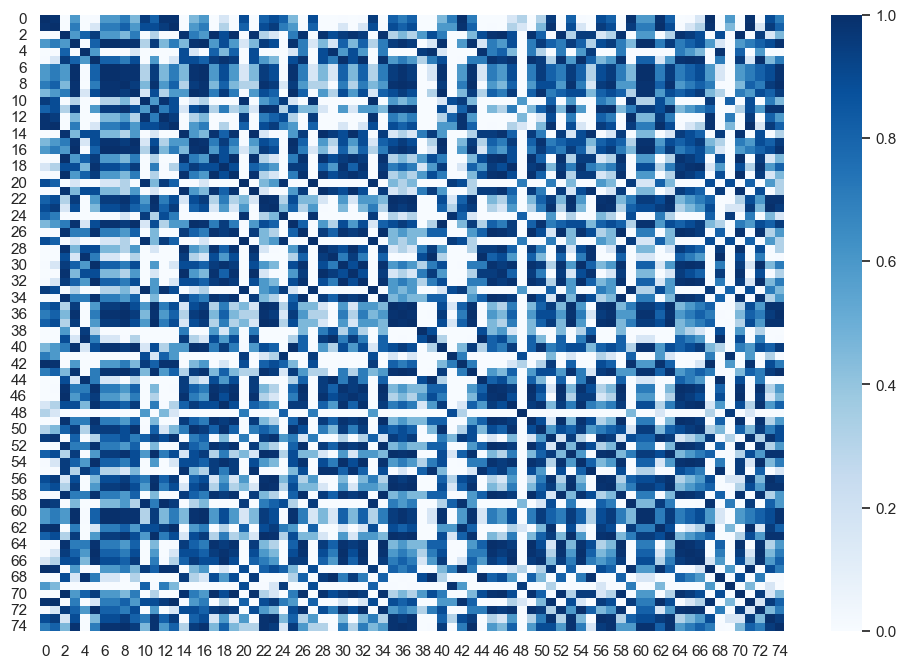

In [12]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(matriz_proyector, vmin = 0, vmax = 1, cmap=sns.color_palette("Blues", as_cmap=True));

<a id='sec_QKE_proba'></a>
#### 5.3.2.2. Quantum Kernel Estimator (QKE) - probabilidades

En este caso sin embargo, en lugar de utilizar el proyector se hace uso de la probabilidad del $\ket{0}$ para calcular el solapamiento.

In [13]:
# kernel cuántico
def distancia_circuit(x,y,n_qubits):
    
    # cuatro cúbits: cuatro características
    n_shots = 8000

    # Create an empty circuit
    circuit = Circuit(n_qubits)

    # Codificación cuántica en puertas RY 
    for pos in range(n_qubits):
        circuit.add(gates.RY(pos, y[pos]))
        circuit.add(gates.RY(pos, x[pos]).dagger())
        circuit.add(gates.M(pos))

    # ejecución del circuito n veces (n_shots)
    result = circuit.execute(nshots=n_shots)

    # Devuelve las probabilidades analíticas
    return result.probabilities()
       
# Se devuelve el probabilidad del base computacional "0000"
kernel = lambda x1, x2, n_qubits: distancia_circuit(x1, x2, n_qubits)[0]

Se verifica que funciona correctamente el kernel cuántico con un dato consigo mismo. El resultado debería ser 1. 

In [14]:
#Se comprueba que el funcionamiento es adecuado.
kernel(X_train[0], X_train[0], nqubits) 

0.9999999999999996

Se analiza la matriz kernel

In [15]:
# Calculamos la matriz kernel al completo
matriz_prob = kernel_matrix(kernel,X_train,X_train,n_qubits)

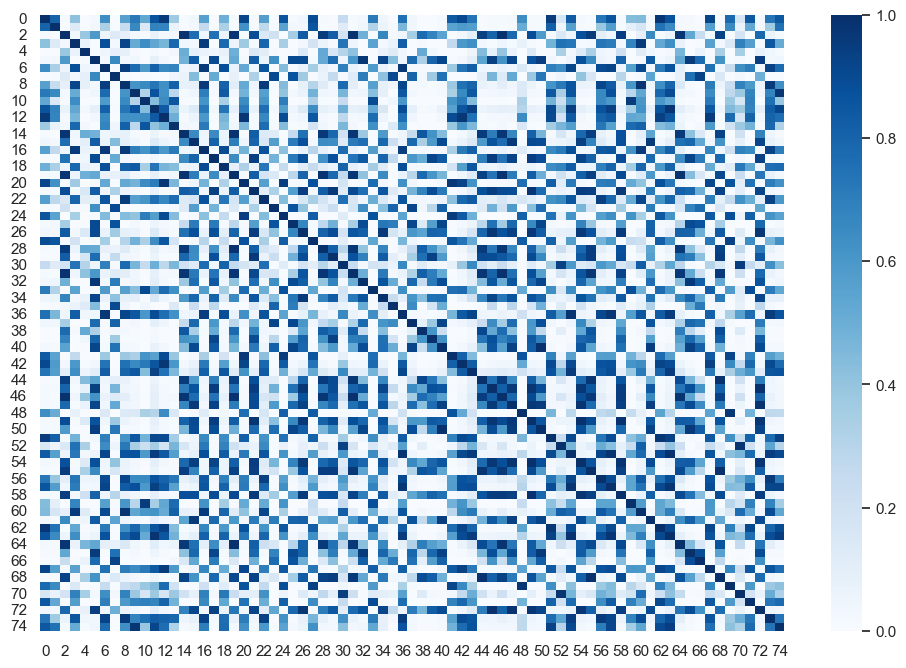

In [16]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(matriz_prob, vmin = 0, vmax = 1, cmap=sns.color_palette("Blues", as_cmap=True));

Como se puede ver es indiferente calcular el solapamiento mediante proyectores o calculando la probabilidad de $\ket{0}$, se puede observar que la matriz kernel es la misma siempre y cuando se aplique el mismo método de codificación.

<a id='notacion'></a>
<div class="alert alert-block alert-danger">
<p style="color: DarkRed;">
<b>Nota</b>: <i>Anexo notación</i>
<br>
Para que la comprensión de los notebooks sea mejor se ha unificado la notación utilizada en los mismos. Para diferenciar un vector de un valor único se hará uso de la negrita. De manera que $\mathbf{x}$ corresponde a un vector y $z$ será una variable de una única componente. 
<br>
<br>    
Si se quiere hacer referencia a dos vectores distintos pero que pertenecen al mismo *dataset* se utilizará un subíndice, es decir, $\mathbf{x_i}$ hará referencia al i-ésimo vector del dataset. Si se quiere referenciar una característica concreta del vector se añadirá un nuevo subíndice, de manera que $\mathbf{x_{i_j}}$ hará referencia a la j-ésima variable del i-ésimo vector.
</p>
</div>

---------------------------
<a id='sec_references'></a>
## Bibliografía


[1].  Quantum feature maps and kernels, https://github.com/Qiskit/textbook/blob/main/notebooks/quantum-machine-learning/kernel.ipynb <a id='bib_textbookkernel'></a>

[2].  Genton, M. G. (2001). Classes of kernels for machine learning: a statistics perspective. Journal of machine learning research, 2(Dec), 299-312. <a id='bib_ClassesKernels'></a> 

[3].  Quantum Kernel Methods, https://github.com/PaddlePaddle/Quantum/blob/master/tutorials/machine_learning/QKernel_EN.ipynb <a id='bib_QuantumKernelMethod'></a>

[4].  Huang, H., Broughton, M., Mohseni, M., Babbush, R., Boixo, S., Neven, H., & McClean, J.R. (2020). Power of data in quantum machine learning. Nature Communications, 12. <a id='bib_PowerData'></a>

[5].  Schuld, M. (2021). Supervised quantum machine learning models are kernel methods. arXiv preprint arXiv:2101.11020. <a id='bib_SupQML'></a>

[6].  Hofmann, T., Schölkopf, B., & Smola, A. J. (2008). Kernel methods in machine learning. <a id='bib_kernelMethodsML'></a>

[7].  Kernel-based training of quantum models with scikit-learn, https://pennylane.ai/qml/demos/tutorial_kernel_based_training.html <a id='bib_pennylane_kernel'></a>

[8].  A rigorous and robust quantum speed-up in supervised machine learning, https://people.eecs.berkeley.edu/~yunchaoliu/slides/quantumkernel_IBM.pdf <a id='bib_quantumSpeedUp'></a>

---
<center>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">
<img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
</center>

License: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.

This work has been financially supported by the Ministry for Digital Transformation and of Civil Service of the Spanish Government through the QUANTUM ENIA project call - Quantum Spain project, and by the European Union through the Recovery, Transformation and Resilience Plan - NextGenerationEU within the framework of the Digital Spain 2026 Agenda.

<img align="left" src=" https://quantumspain-project.es/wp-content/uploads/2024/02/Banner-QS_GOB_v2.png" width="1000px" />